In [211]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Load data
data = pd.read_csv('UsArrests.csv')
data.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [212]:
data.dtypes


City         object
Murder      float64
Assault       int64
UrbanPop      int64
Rape        float64
dtype: object

In [213]:
# no of duplicated rows in data frames
data.duplicated().value_counts()

False    50
dtype: int64

In [214]:
data.isnull().sum()

# There no missing values in the dataset

City        0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

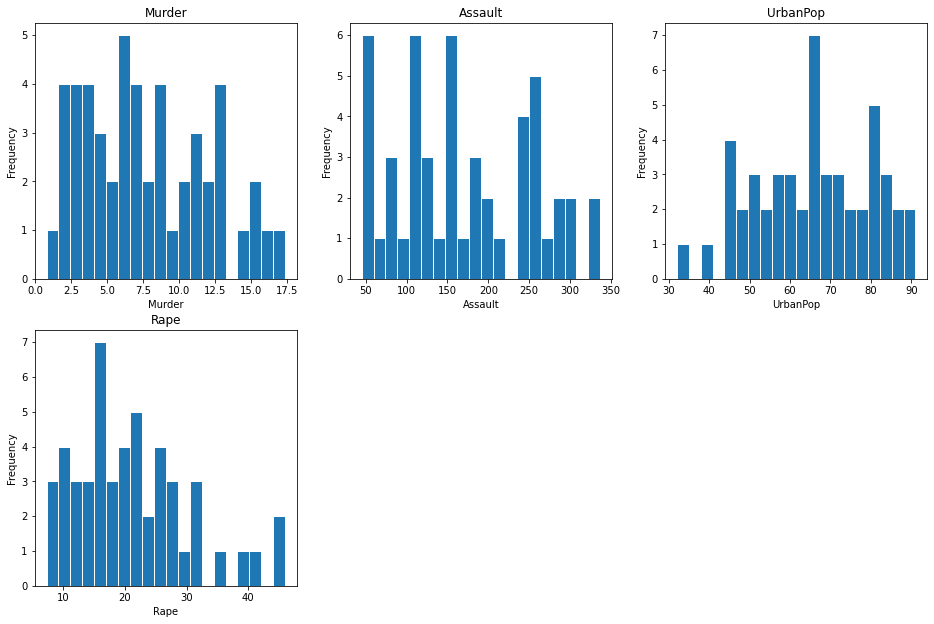

In [215]:
# Visualising the histogram of the distribution of all numeric variables
# List out the numerical variables that are part of the DataFrame

num_vars=['Murder','Assault','UrbanPop','Rape']

plt.figure(figsize=(16,16))
for i in range(len(num_vars)):
    plt.subplot(3, 3, i+1)
    var=num_vars[i]
    data[var].plot.hist(edgecolor = 'w',bins = 20)
    plt.title(var)
    plt.xlabel(var)
    
    #plt.ylabel('Total Numbers')

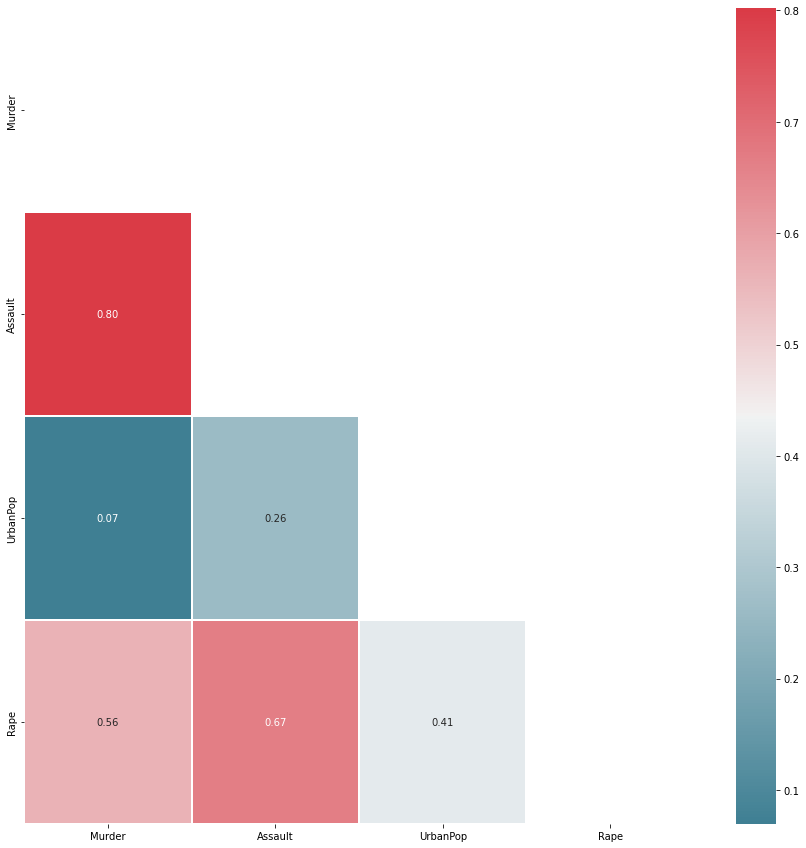

In [216]:
# Create a plot of the data using all features to show the positive and negative

colormap = sns.diverging_palette(220, 10, as_cmap=True)

def corr_heatmap(data):
  # get correlations
  corrs = data.corr()

  # pick appropriate palette for heatmap

  # Plot figsize
  fig, ax = plt.subplots(figsize=(15, 15))

  # to mask mirrored side of heatmap
  dropSelf = np.zeros_like(corrs)
  dropSelf[np.triu_indices_from(dropSelf)] = True

  # Generate Heat Map, with annotations of the correlation strength and 2-decimal floats
  ax = sns.heatmap(corrs, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf, linewidth=2)

  plt.show()

corr_heatmap(data)

In [217]:
# Correlation is stronger between murder and assault share a very strong positive correlation. Also Rape ad Assault 
# Murder is also negatively correlated with urban population.

# https://re-thought.com/exploring-correlation-in-python/

In [218]:
data = data.set_index('City')



In [219]:
# Scale the data, then apply PCA to it. 

# select and standardize features
X = StandardScaler().fit_transform(data.values)


# choose number of components to be generated
nr_comps = 3


pca = PCA(n_components=nr_comps)

# obtain components
principal_components = pca.fit_transform(X)

# transform the components into a pandas data frame
pca_data = pd.DataFrame(principal_components, index=data.index)

pca_data.head()

,0,1,2
City,,,
Alabama,0.985566,1.133392,-0.444269
Alaska,1.950138,1.073213,2.040003
Arizona,1.763164,-0.745957,0.054781
Arkansas,-0.141420,1.119797,0.114574
California,2.523980,-1.542934,0.598557


In [221]:
# The Principle components are uncorrelated, showing that PCA has summarised all related information in a smaller number of variables.

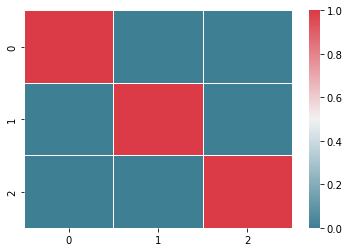

In [222]:
ax = sns.heatmap(pca_data.corr(), cmap=colormap,linewidth=1)
plt.show()

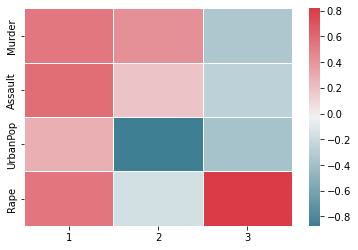

In [138]:
# access the correlations between the components and original variables using the components_ method of our PCA() object.

components = pd.DataFrame(pca.components_, columns=data.columns, index=range(1, nr_comps+1)).transpose()
ax = sns.heatmap(components,cmap=colormap,linewidth=1)
plt.show()

In [139]:
# we can conclude that there is a strong correlation between the crime variables.

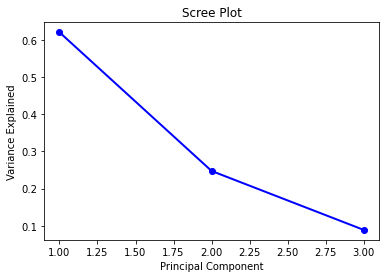

In [158]:
PC_values = np.arange(pca.n_components) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [156]:
pca.explained_variance_ 

array([2.53085875, 1.00996444, 0.36383998])

In [157]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 ])

In [142]:
# according to the explained variance and variance ratio we can see that the first component is using up

In [143]:
# prepare data for training, note that we do not supply y in an unsupervised task (which is why it is called unsupervised).
X = data[['Murder','Assault']].values.reshape(-1,2)  

print('Data size:')
print(X.shape)

Data size:
(50, 2)


C:\Users\gemariah\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


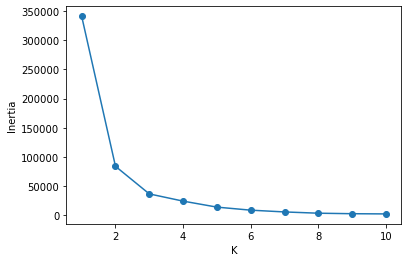

In [144]:
from sklearn.cluster import KMeans

def eval_Kmeans(x, k, r):
    kmeans = KMeans(n_clusters=k, random_state=r)
    kmeans.fit(x)    
    return kmeans.inertia_

def elbow_Kmeans(x, max_k=10, r=123):
    within_cluster_vars = [eval_Kmeans(x, k, r) for k in range(1,max_k+1)]
    plt.plot(range(1,11), within_cluster_vars,marker='o')
    plt.xlabel('K')
    plt.ylabel('Inertia')
    plt.show()

elbow_Kmeans(X)

In [145]:
print(''''However, for illustration purposes, we will also show you the so-called Elbow method for choosing a value for K. 
       The Elbow method is commonly used strategy in which the algorithm is run multiple times with increasing values of k. 
      This is then plotted against the sum of squared distances of samples to their closest cluster center (called inertia). 
      The value of k to choose is identified from the resulting plot where there is an 'elbow' in the graph.''')



'However, for illustration purposes, we will also show you the so-called Elbow method for choosing a value for K. 
       The Elbow method is commonly used strategy in which the algorithm is run multiple times with increasing values of k. 
      This is then plotted against the sum of squared distances of samples to their closest cluster center (called inertia). 
      The value of k to choose is identified from the resulting plot where there is an 'elbow' in the graph.


In [146]:
print ('''Arcoding to the diagram, the elbow runs between 2 and 4''')

Arcoding to the diagram, the elbow runs between 2 and 4


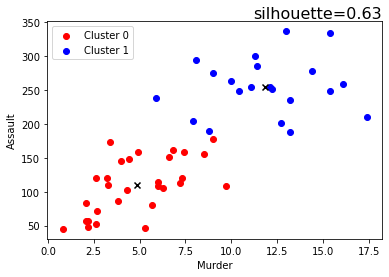

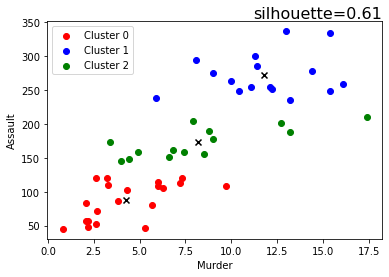

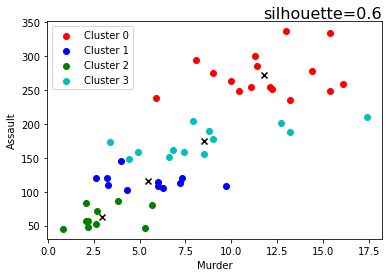

In [147]:
from sklearn.metrics import accuracy_score, silhouette_score


def scatter_Kmeans(x, k = 3, r=123):
    
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=r)
    y_pred = kmeans.fit_predict(x)
    colours = 'rbgcmy'
    for c in range(k):
      plt.scatter(x[y_pred == c, 0], x[y_pred == c,1], c = colours[c], label = 'Cluster {}'.format(c))
      plt.scatter(kmeans.cluster_centers_[c, 0], kmeans.cluster_centers_[c, 1], marker='x', c = 'black')
    
    score = round(silhouette_score(X, kmeans.labels_, metric='euclidean'),2)
    plt.title('silhouette={}'.format(score), loc='right', fontdict={'fontsize': 16}, pad=-14)
    plt.xlabel('Murder')
    plt.ylabel('Assault')
    plt.legend()
    plt.show()

for k in range(2,5):
    
  scatter_Kmeans(X, k, r=0)
  

In [148]:
# Based on the clusters above, murder is determined by assault. Thus we see that the best silhouette score is actually achieved using k=6.
# silhoutte = 6

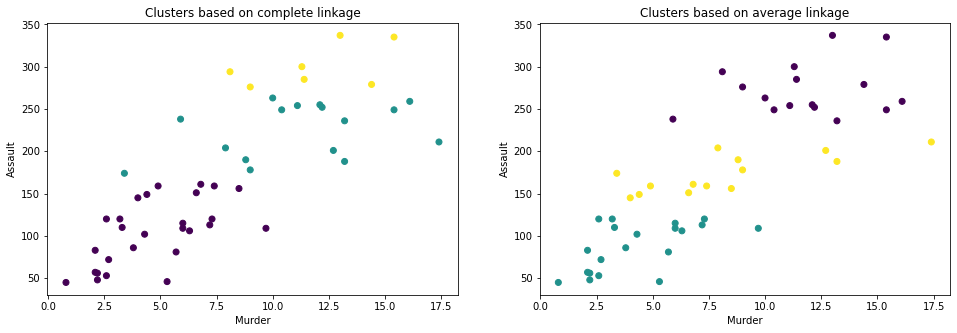

In [149]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

K = 3
plt.figure(figsize=[25,5])

linkage_types = ['complete', 'average']

for i, l in enumerate(linkage_types):
  plt.subplot(1, 3, i+1)
  
  cluster = AgglomerativeClustering(n_clusters=K, affinity='euclidean', linkage=l)
  cluster.fit_predict(X)

  ax = plt.scatter(X[:,0], X[:,1], c=cluster.labels_)
  
  plt.title('Clusters based on {} linkage'.format(l))
  plt.xlabel('Murder')
  plt.ylabel('Assault')

L = 'complete'

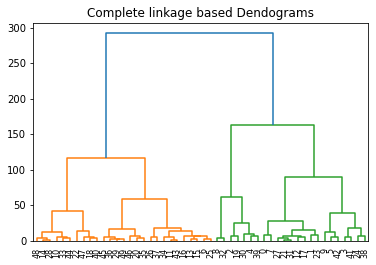

In [150]:
plt.title("Complete linkage based Dendograms") 

dend = dendrogram(linkage(X, method='complete')) 

In [151]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, silhouette_score

km = KMeans(n_clusters=2, random_state=42)

# Fit the KMeans model

km.fit_predict(X)

# Calculate Silhoutte Score

score = silhouette_score(X, km.labels_, metric='euclidean')

# Print the score

print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.631


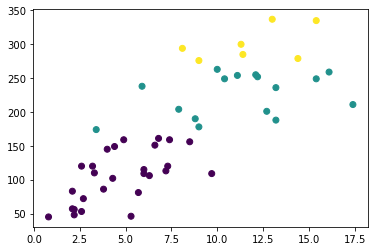

In [152]:
cluster = AgglomerativeClustering(n_clusters=K, affinity='euclidean', linkage=L)
cluster.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=cluster.labels_)

In [153]:
print (''' The data points in the bottom right belong to the victims that were not entirely murdered due to assaults. These are victims whose murder was intentional. The victims at top right have high chances of having been assaulted before being murdered. ''')

 The data points in the bottom right belong to the victims that were not entirely murdered due to assaults. These are victims whose murder was intentional. The victims at top right have high chances of having been assaulted before being murdered. 


SyntaxError: positional argument follows keyword argument (Temp/ipykernel_6548/4224412491.py, line 3)